<a href="https://colab.research.google.com/github/sazzad90/ML/blob/main/LinearRegression_multipleFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#step-1 generate data

X,Y = make_regression(n_samples = 500,n_features=10,n_informative=5,noise=2.5,random_state=0)
print(X.shape, Y.shape)
pd.DataFrame(X).head(100)


(500, 10) (500,)


<ipython-input-41-0dc5e6af3a23>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090
...,...,...,...,...,...,...,...,...,...,...
95,1.396849,2.123526,-0.104049,0.881225,0.374969,-0.432827,-0.088373,0.494445,0.761391,0.267671
96,-0.954943,0.100564,1.102283,-0.697073,1.010428,-1.470402,0.207334,0.496179,0.576956,0.759157
97,0.715939,0.542611,0.147434,-0.977465,0.880938,-2.994613,0.879390,1.808132,0.436638,0.635425
98,-0.177813,-1.892362,1.905064,-0.014777,1.054758,0.250998,-0.300479,0.960048,-0.416499,-0.355029


In [43]:
# step-2 normalize data

def normalise(X):
  u = X.mean(axis=0)
  std = X.std(axis=0)

  return (X-u)/std

X = normalise(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


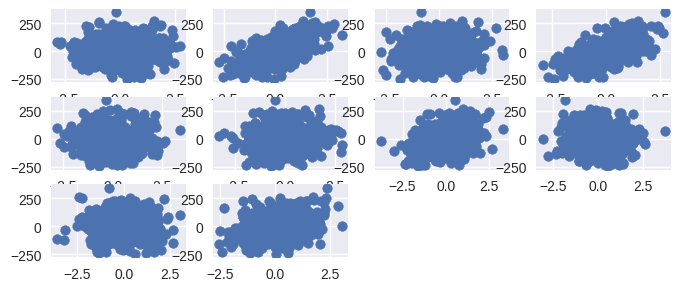

In [44]:
# visualize y as function of each feature

for f in range(0,10):
  plt.subplot(5,4,f+1)
  plt.scatter(X[:,f],Y)

plt.show()

In [45]:
# step-4 train test split
XT,Xt,YT,Yt = train_test_split(X,Y,test_size=0.3,shuffle=False,random_state=0)
Yt.shape

(150,)

In [36]:
n_features = 10
def preprocess(X):
  #adding a dummy col of 1s in X as 0th col
  if X.shape[1] == n_features:
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
  return X

In [46]:
# step-5 modelling / LR with multiple features
def hypothesis(X, theta):
  return np.dot(X,theta)  # vector multiplication

def loss(X,Y,theta):
  Yp = hypothesis(X,theta)
  error = np.mean((Y-Yp)**2)
  return error

def gradient(X,Y,theta):
  Yp = hypothesis(X,theta)
  grad = np.dot(X.T,(Yp - Y))
  m = X.shape[0]
  return grad/m

XT = preprocess(XT)
Xt = preprocess(Xt)
print(XT.shape, Xt.shape)

def train(X,Y,learning_rate = 0.1,max_iters=100):
  n = X.shape[1]
  theta = np.random.randn(n)
  error_list = []

  for i in range(max_iters):
    e = loss(X,Y,theta)
    error_list.append(e)
    theta = theta - learning_rate*gradient(X,Y,theta)

  plt.plot(error_list)
  return theta


(350, 11) (150, 11)


[-3.85835265e+00 -2.64768946e-02  6.04661027e+01  1.07096424e+01
  6.36165741e+01 -4.51283292e-02  9.27090465e-02  4.09314339e+01
  5.19002179e-02  7.55485722e-02  2.52780927e+01]


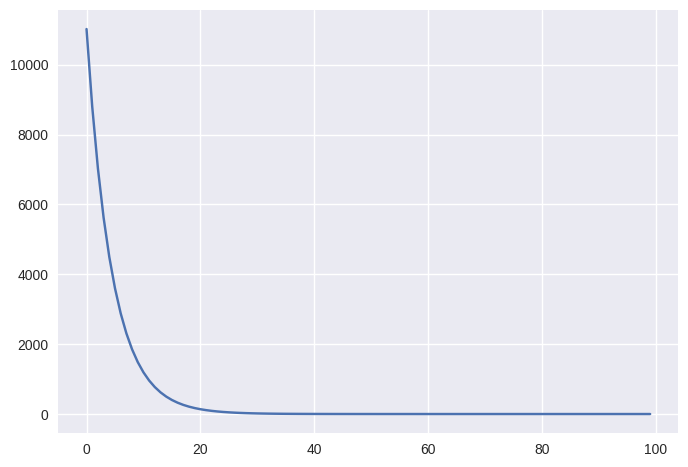

In [47]:
theta = train(XT,YT)
print(theta)

In [48]:
# accuracy test
def r2score(Y,Yp):
  Ymean = Y.mean()
  num = np.sum((Y-Yp)**2)
  denom = np.sum((Y-Ymean)**2)
  return 1-(num/denom)

In [49]:
Yp = hypothesis(Xt,theta)
r2score(Yt,Yp)

0.9993272438012961

In [56]:
###### Linear regression with SKLearn ######
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [57]:
model.fit(XT,YT)

LinearRegression()

In [59]:
model.intercept_ # theta0

-3.8588552889976255

In [60]:
model.coef_ # other theta values

array([ 0.00000000e+00, -2.57714838e-02,  6.04664976e+01,  1.07117932e+01,
        6.36203226e+01, -4.67932245e-02,  9.06195814e-02,  4.09346226e+01,
        5.29286881e-02,  7.30354132e-02,  2.52756266e+01])

In [61]:
Yp = model.predict(Xt)

In [55]:
model.score(Xt,Yt)

0.9993268935493834